In [1]:
TRAIN_NUMBER = "04"

In [3]:
import pandas as pd

# Path to the CSV file
file_path = r"C:\Users\Administrator\OneDrive\IAAC\04_Thesis\DApredictor\List of defective rooms.csv"

# Read the CSV file
df = pd.read_csv(file_path, header=None, names=['original'])
df=df.iloc[1:, :]
df

,original
1,12042
2,12044
3,12046
4,12047
5,12048
...,...
544,43328
545,43330
546,43332
547,43333


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 1 to 548
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   original  548 non-null    object
dtypes: object(1)
memory usage: 4.4+ KB


In [5]:
# Create a new dataframe with two columns
df_new = pd.DataFrame()
df_new['first_two_digits'] = df['original'].astype(str).str[:2]
df_new['last_three_digits'] = df['original'].astype(str).str[-3:]

df_new

,first_two_digits,last_three_digits
1,12,042
2,12,044
3,12,046
4,12,047
5,12,048
...,...,...
544,43,328
545,43,330
546,43,332
547,43,333


In [6]:
# Convert the columns back to integers
df_new['first_two_digits'] = df_new['first_two_digits'].astype(int)
df_new['last_three_digits'] = df_new['last_three_digits'].astype(int)
df_new

,first_two_digits,last_three_digits
1,12,42
2,12,44
3,12,46
4,12,47
5,12,48
...,...,...
544,43,328
545,43,330
546,43,332
547,43,333


In [7]:
df_new['formatted_string'] = 'SM' + df_new['first_two_digits'].astype(str) + '_room' + df_new['last_three_digits'].astype(str)
df_new

,first_two_digits,last_three_digits,formatted_string
1,12,42,SM12_room42
2,12,44,SM12_room44
3,12,46,SM12_room46
4,12,47,SM12_room47
5,12,48,SM12_room48
...,...,...,...
544,43,328,SM43_room328
545,43,330,SM43_room330
546,43,332,SM43_room332
547,43,333,SM43_room333


In [8]:
import os
# Path to the directory containing the PNG files
directory_path = f"train{TRAIN_NUMBER}\dataset\input"

# Get the list of files to delete
files_to_delete = df_new['formatted_string'].tolist()

# Delete the files
for file_name in files_to_delete:
    file_path = os.path.join(directory_path, file_name + '.png')
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Deleted: {file_path}")
    else:
        print(f"File not found: {file_path}")

print("File deletion process completed.")

File not found: train04\dataset\input\SM12_room42.png
File not found: train04\dataset\input\SM12_room44.png
File not found: train04\dataset\input\SM12_room46.png
File not found: train04\dataset\input\SM12_room47.png
File not found: train04\dataset\input\SM12_room48.png
File not found: train04\dataset\input\SM12_room49.png
File not found: train04\dataset\input\SM12_room50.png
File not found: train04\dataset\input\SM12_room51.png
File not found: train04\dataset\input\SM12_room52.png
File not found: train04\dataset\input\SM12_room81.png
File not found: train04\dataset\input\SM12_room85.png
File not found: train04\dataset\input\SM12_room90.png
File not found: train04\dataset\input\SM12_room91.png
File not found: train04\dataset\input\SM12_room93.png
File not found: train04\dataset\input\SM12_room94.png
File not found: train04\dataset\input\SM12_room95.png
File not found: train04\dataset\input\SM12_room97.png
File not found: train04\dataset\input\SM12_room99.png
File not found: train04\data

In [9]:
import os
# Path to the directory containing the PNG files
directory_path = f"train{TRAIN_NUMBER}\dataset\groundtruth"

# Get the list of files to delete
files_to_delete = df_new['formatted_string'].tolist()

# Delete the files
for file_name in files_to_delete:
    file_path = os.path.join(directory_path, file_name + '.png')
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Deleted: {file_path}")
    else:
        print(f"File not found: {file_path}")

print("File deletion process completed.")

File not found: train04\dataset\groundtruth\SM12_room42.png
File not found: train04\dataset\groundtruth\SM12_room44.png
File not found: train04\dataset\groundtruth\SM12_room46.png
File not found: train04\dataset\groundtruth\SM12_room47.png
File not found: train04\dataset\groundtruth\SM12_room48.png
File not found: train04\dataset\groundtruth\SM12_room49.png
File not found: train04\dataset\groundtruth\SM12_room50.png
File not found: train04\dataset\groundtruth\SM12_room51.png
File not found: train04\dataset\groundtruth\SM12_room52.png
File not found: train04\dataset\groundtruth\SM12_room81.png
File not found: train04\dataset\groundtruth\SM12_room85.png
File not found: train04\dataset\groundtruth\SM12_room90.png
File not found: train04\dataset\groundtruth\SM12_room91.png
File not found: train04\dataset\groundtruth\SM12_room93.png
File not found: train04\dataset\groundtruth\SM12_room94.png
File not found: train04\dataset\groundtruth\SM12_room95.png
File not found: train04\dataset\groundtr

In [10]:
import tensorflow as tf

def check_image_channels(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image)
    print("Image shape:", image.shape)

# Example usage
check_image_channels('train01\dataset\input\SM16_room84.png')


Image shape: (512, 512, 4)


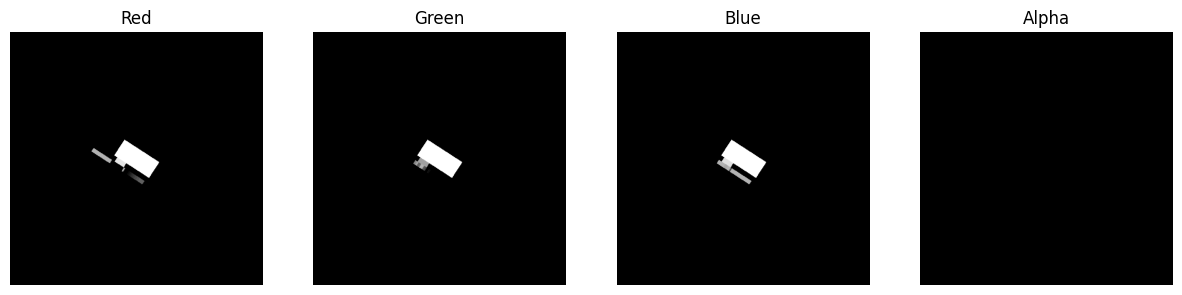

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_image_channels(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=0)  # Let TensorFlow infer the number of channels
    image = tf.image.convert_image_dtype(image, tf.float32)  # Convert to float for visualization
    
    channels = tf.split(image, num_or_size_splits=image.shape[-1], axis=-1)
    channel_names = ['Red', 'Green', 'Blue', 'Alpha'] if image.shape[-1] == 4 else ['Red', 'Green', 'Blue']
    
    plt.figure(figsize=(15, 5))
    for i, (channel, name) in enumerate(zip(channels, channel_names)):
        plt.subplot(1, len(channels), i+1)
        plt.imshow(channel.numpy().squeeze(), cmap='gray')
        plt.title(name)
        plt.axis('off')
    plt.show()

# Example usage
plot_image_channels('train01\dataset\input\SM16_room84.png')


In [14]:
import tensorflow as tf
import numpy as np

def print_channel_ranges(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=0)  # Let TensorFlow infer the number of channels
    image = tf.image.convert_image_dtype(image, tf.float32)  # Convert to float for consistent handling
    image_array = image.numpy()
    
    print("Image shape:", image_array.shape)
    print("Min and Max values per channel:")
    for i in range(image_array.shape[-1]):
        print(f"Channel {i+1}: {image_array[:,:,i].min()} to {image_array[:,:,i].max()}")

# Example usage
print_channel_ranges('train01\dataset\input\SM12_room84.png')


Image shape: (512, 512, 4)
Min and Max values per channel:
Channel 1: 0.0 to 1.0
Channel 2: 0.0 to 1.0
Channel 3: 0.0 to 1.0
Channel 4: 1.0 to 1.0


In [ ]:
import tensorflow as tf
import numpy as np

np.set_printoptions(threshold=1000)

# Function to view image as array
def view_image_as_array(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=0)  # Let TensorFlow infer the number of channels
    image = tf.image.convert_image_dtype(image, tf.float32)  # Convert to float for consistent handling
    
    image_array = image.numpy()
    
    # Setting NumPy print options to display the full array
    np.set_printoptions(threshold=np.inf)
    
    print("Image shape:", image_array.shape)
    for i in range(image_array.shape[-1]):
        print(f"Channel {i+1} array:\n", image_array[:, :, i])

# Example usage
view_image_as_array('train01\dataset\input\SM12_room84.png')